In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [2]:
data1 = pd.read_csv('csv_Conversion/lstm_pre.csv')
data2 = pd.read_csv('csv_Conversion/lstm_pre_2.csv') 

print("data1 shape: ", data1.shape)
print("data2 shape: ", data2.shape)

data1 shape:  (28602, 440)
data2 shape:  (109309, 257)


In [3]:
data1.head()

,2015_01_01_12,2015_01_02_12,2015_01_03_12,2015_01_04_12,2015_01_05_12,2015_01_06_12,2015_01_07_12,2015_01_08_12,2015_01_09_12,2015_01_10_12,...,2016_03_06_12,2016_03_07_12,2016_03_08_12,2016_03_09_12,2016_03_10_12,2016_03_11_12,2016_03_12_12,2016_03_13_12,2016_03_14_12,2016_03_15_12
0,4.236148,3.435306,3.704314,14.447327,2.236722,11.879619,4.762789,11.760188,5.617396,27.279308,...,2.948250,18.378168,3.442676,17.198399,50.592438,2.555496,2.722167,3.538709,6.243910,3.682356
1,4.545059,11.546896,2.893327,5.119482,3.397513,35.807686,8.405360,3.996779,10.812445,23.231089,...,7.004245,18.801733,2.740824,18.803307,36.054268,11.919170,3.115291,7.413157,6.178827,3.680354
2,4.892695,3.650336,17.911240,2.027318,11.988195,5.160114,5.429402,2.298103,23.106897,18.042131,...,9.238442,19.736856,3.010371,18.285880,29.391850,40.594563,2.216719,2.209702,2.088176,7.219844
3,4.157365,4.187040,33.199060,2.452830,30.736712,4.176468,3.992732,8.363498,34.562695,12.560413,...,9.002649,14.126089,3.767447,16.320086,21.667961,36.771250,6.428369,5.034198,9.682878,8.496073
4,5.394791,7.678216,18.248724,3.343023,19.824266,4.093855,5.840061,15.701975,31.653230,10.890961,...,4.830349,12.256178,4.308113,17.095823,28.077200,18.941845,5.585636,4.701963,2.873105,11.282166


In [4]:
data = pd.concat([data1, data2], axis=1)

data.head()

,2015_01_01_12,2015_01_02_12,2015_01_03_12,2015_01_04_12,2015_01_05_12,2015_01_06_12,2015_01_07_12,2015_01_08_12,2015_01_09_12,2015_01_10_12,...,2016_11_18_12,2016_11_19_12,2016_11_20_12,2016_11_21_12,2016_11_22_12,2016_11_23_12,2016_11_24_12,2016_11_25_12,2016_11_26_12,2016_11_27_12
0,4.236148,3.435306,3.704314,14.447327,2.236722,11.879619,4.762789,11.760188,5.617396,27.279308,...,2.194170,7.354535,3.996560,3.600203,35.591484,4.994758,1.922939,17.932323,11.387667,17.286638
1,4.545059,11.546896,2.893327,5.119482,3.397513,35.807686,8.405360,3.996779,10.812445,23.231089,...,4.720965,14.832079,7.948000,21.070848,36.556040,6.751029,1.922939,11.304115,8.456831,9.027338
2,4.892695,3.650336,17.911240,2.027318,11.988195,5.160114,5.429402,2.298103,23.106897,18.042131,...,3.711100,9.777819,2.592198,30.977005,80.235504,6.751633,5.102162,19.949022,5.825065,2.631542
3,4.157365,4.187040,33.199060,2.452830,30.736712,4.176468,3.992732,8.363498,34.562695,12.560413,...,4.973507,10.054759,2.769225,3.600377,77.929320,6.492031,28.996054,13.319260,17.428701,3.639240
4,5.394791,7.678216,18.248724,3.343023,19.824266,4.093855,5.840061,15.701975,31.653230,10.890961,...,8.066488,3.060668,3.822765,10.926255,81.789250,4.282569,37.154404,6.755736,14.676730,4.092536


In [5]:
data.isnull().values.any()

True

In [6]:
print(data.columns)

Index(['2015_01_01_12', '2015_01_02_12', '2015_01_03_12', '2015_01_04_12',
       '2015_01_05_12', '2015_01_06_12', '2015_01_07_12', '2015_01_08_12',
       '2015_01_09_12', '2015_01_10_12',
       ...
       '2016_11_18_12', '2016_11_19_12', '2016_11_20_12', '2016_11_21_12',
       '2016_11_22_12', '2016_11_23_12', '2016_11_24_12', '2016_11_25_12',
       '2016_11_26_12', '2016_11_27_12'],
      dtype='object', length=697)


In [7]:
data_ = data.astype(float)
data_.fillna(method='ffill', inplace=True)
data_.fillna(method='bfill', inplace=True)
# df_for_training = list_data.astype(float)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8984\407742164.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.fillna(method='ffill', inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8984\407742164.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_.fillna(method='bfill', inplace=True)


In [8]:
data_.isnull().values.any()

False

In [9]:
df_sampled = data_.sample(frac=0.2, random_state=1) 
scaler = StandardScaler()
scaler = scaler.fit(df_sampled)
df_for_training_scaled = scaler.transform(df_sampled)
df_for_training_scaled.shape

(21862, 697)

In [10]:
trainX = []
trainY = []

n_future = 1  
n_past = 14

In [11]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (21848, 14, 697).
trainY shape == (21848, 1).


In [12]:
# trainY.columns

In [13]:
trainX = torch.tensor(trainX, dtype=torch.float32)
trainY = torch.tensor(trainY, dtype=torch.float32)

In [14]:
train_dataset = TensorDataset(trainX, trainY)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [15]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=697, hidden_size=64, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=64, hidden_size=32, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.dense = nn.Linear(32, 1)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = self.dropout(x[:, -1, :])
        x = self.dense(x)
        return x

In [16]:
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 300
model.train()
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [17]:
torch.save(model.state_dict(), 'lstm_model.pth')

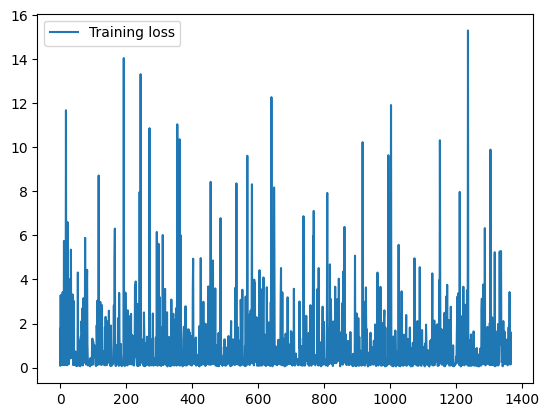

In [18]:
train_losses = []
model.eval()
with torch.no_grad():
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        train_losses.append(loss.item())

plt.plot(train_losses, label='Training loss')
plt.legend()

In [19]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# test_ori_data = pd.read_csv('csv_Conversion/lstm_test.csv')
# print(test_o


In [62]:
n_past = 16
n_days_for_prediction=30  #let us predict past 15 days

In [63]:
train_dates = data.columns
train_dates = [date.replace('_', '-') + ':00:00' for date in train_dates]

# Convert to datetime objects
train_dates = [pd.to_datetime(date, format='%Y-%m-%d-%H:%M:%S') for date in train_dates]
print(train_dates)

[Timestamp('2015-01-01 12:00:00'), Timestamp('2015-01-02 12:00:00'), Timestamp('2015-01-03 12:00:00'), Timestamp('2015-01-04 12:00:00'), Timestamp('2015-01-05 12:00:00'), Timestamp('2015-01-06 12:00:00'), Timestamp('2015-01-07 12:00:00'), Timestamp('2015-01-08 12:00:00'), Timestamp('2015-01-09 12:00:00'), Timestamp('2015-01-10 12:00:00'), Timestamp('2015-01-11 12:00:00'), Timestamp('2015-01-12 12:00:00'), Timestamp('2015-01-13 12:00:00'), Timestamp('2015-01-14 12:00:00'), Timestamp('2015-01-15 12:00:00'), Timestamp('2015-01-16 12:00:00'), Timestamp('2015-01-17 12:00:00'), Timestamp('2015-01-18 12:00:00'), Timestamp('2015-01-19 12:00:00'), Timestamp('2015-01-20 12:00:00'), Timestamp('2015-01-21 12:00:00'), Timestamp('2015-01-22 12:00:00'), Timestamp('2015-01-23 12:00:00'), Timestamp('2015-01-24 12:00:00'), Timestamp('2015-01-25 12:00:00'), Timestamp('2015-01-26 12:00:00'), Timestamp('2015-01-27 12:00:00'), Timestamp('2015-01-28 12:00:00'), Timestamp('2015-01-29 12:00:00'), Timestamp('20

In [64]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2016-11-14 12:00:00'), Timestamp('2016-11-15 12:00:00'), Timestamp('2016-11-16 12:00:00'), Timestamp('2016-11-17 12:00:00'), Timestamp('2016-11-18 12:00:00'), Timestamp('2016-11-21 12:00:00'), Timestamp('2016-11-22 12:00:00'), Timestamp('2016-11-23 12:00:00'), Timestamp('2016-11-25 12:00:00'), Timestamp('2016-11-28 12:00:00'), Timestamp('2016-11-29 12:00:00'), Timestamp('2016-11-30 12:00:00'), Timestamp('2016-12-01 12:00:00'), Timestamp('2016-12-02 12:00:00'), Timestamp('2016-12-05 12:00:00'), Timestamp('2016-12-06 12:00:00'), Timestamp('2016-12-07 12:00:00'), Timestamp('2016-12-08 12:00:00'), Timestamp('2016-12-09 12:00:00'), Timestamp('2016-12-12 12:00:00'), Timestamp('2016-12-13 12:00:00'), Timestamp('2016-12-14 12:00:00'), Timestamp('2016-12-15 12:00:00'), Timestamp('2016-12-16 12:00:00'), Timestamp('2016-12-19 12:00:00'), Timestamp('2016-12-20 12:00:00'), Timestamp('2016-12-21 12:00:00'), Timestamp('2016-12-22 12:00:00'), Timestamp('2016-12-23 12:00:00'), Timestamp('20

In [65]:
trainX = torch.tensor(trainX, dtype=torch.float32)

with torch.no_grad():
    model.eval()
    prediction = model(trainX[-n_days_for_prediction:])

print(prediction)


# prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
# print(prediction)


C:\Users\Dell\AppData\Local\Temp\ipykernel_8984\3049759841.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainX = torch.tensor(trainX, dtype=torch.float32)


tensor([[ 0.0032],
        [-0.0054],
        [ 0.0110],
        [-0.0035],
        [ 0.0312],
        [ 0.0649],
        [ 0.0543],
        [ 0.0580],
        [ 0.0530],
        [ 0.0536],
        [ 0.0269],
        [ 0.0354],
        [ 0.0217],
        [ 0.0386],
        [ 0.0045],
        [ 0.0013],
        [ 0.0525],
        [ 0.0654],
        [ 0.0882],
        [ 0.0376],
        [ 0.0464],
        [ 0.0363],
        [ 0.0445],
        [ 0.0274],
        [ 0.0455],
        [ 0.0433],
        [ 0.0399],
        [ 0.0775],
        [ 0.0926],
        [ 0.0943]])


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data
scaler.fit(df_sampled.values)

MinMaxScaler()

In [67]:
prediction_copies = np.repeat(prediction, df_sampled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:, 0]


In [68]:
forecast_dates = [time_i.date() for time_i in predict_period_dates]
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Open': y_pred_future})
print("df_forecast: ", df_forecast)

df_forecast:            Date      Open
0   2016-11-14 -2.093775
1   2016-11-15 -2.102368
2   2016-11-16 -2.086033
3   2016-11-17 -2.100483
4   2016-11-18 -2.065769
5   2016-11-21 -2.032116
6   2016-11-22 -2.042660
7   2016-11-23 -2.039015
8   2016-11-25 -2.044028
9   2016-11-28 -2.043405
10  2016-11-29 -2.070073
11  2016-11-30 -2.061608
12  2016-12-01 -2.075303
13  2016-12-02 -2.058375
14  2016-12-05 -2.092542
15  2016-12-06 -2.095662
16  2016-12-07 -2.044535
17  2016-12-08 -2.031628
18  2016-12-09 -2.008787
19  2016-12-12 -2.059412
20  2016-12-13 -2.050553
21  2016-12-14 -2.060744
22  2016-12-15 -2.052461
23  2016-12-16 -2.069574
24  2016-12-19 -2.051476
25  2016-12-20 -2.053649
26  2016-12-21 -2.057058
27  2016-12-22 -2.019447
28  2016-12-23 -2.004375
29  2016-12-27 -2.002656


In [69]:
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
print("df_forecast['Date']: ", df_forecast['Date'])

df_forecast['Date']:  0    2016-11-14
1    2016-11-15
2    2016-11-16
3    2016-11-17
4    2016-11-18
5    2016-11-21
6    2016-11-22
7    2016-11-23
8    2016-11-25
9    2016-11-28
10   2016-11-29
11   2016-11-30
12   2016-12-01
13   2016-12-02
14   2016-12-05
15   2016-12-06
16   2016-12-07
17   2016-12-08
18   2016-12-09
19   2016-12-12
20   2016-12-13
21   2016-12-14
22   2016-12-15
23   2016-12-16
24   2016-12-19
25   2016-12-20
26   2016-12-21
27   2016-12-22
28   2016-12-23
29   2016-12-27
Name: Date, dtype: datetime64[ns]


In [70]:
df_sampled = pd.DataFrame(np.random.randn(1, len(data.columns)), columns=data.columns)
df_sampled_long = df_sampled.melt(var_name='Date', value_name='Open')
df_sampled_long['Date'] = pd.to_datetime(df_sampled_long['Date'], format='%Y_%m_%d_%H')

# Verify the reshaped DataFrame
print(df_sampled_long.head())

                 Date      Open
0 2015-01-01 12:00:00 -1.211236
1 2015-01-02 12:00:00  1.322382
2 2015-01-03 12:00:00 -1.356449
3 2015-01-04 12:00:00  0.008811
4 2015-01-05 12:00:00 -1.413631


In [71]:
original = df_sampled_long
original = original.loc[original['Date'] >= '2015-05-01']
print(original)

                   Date      Open
120 2015-05-01 12:00:00  0.869262
121 2015-05-02 12:00:00  0.738434
122 2015-05-03 12:00:00 -0.993040
123 2015-05-04 12:00:00 -0.763686
124 2015-05-05 12:00:00 -0.638068
..                  ...       ...
692 2016-11-23 12:00:00 -0.698473
693 2016-11-24 12:00:00 -1.159856
694 2016-11-25 12:00:00 -1.004757
695 2016-11-26 12:00:00 -1.377780
696 2016-11-27 12:00:00 -0.648061

[577 rows x 2 columns]


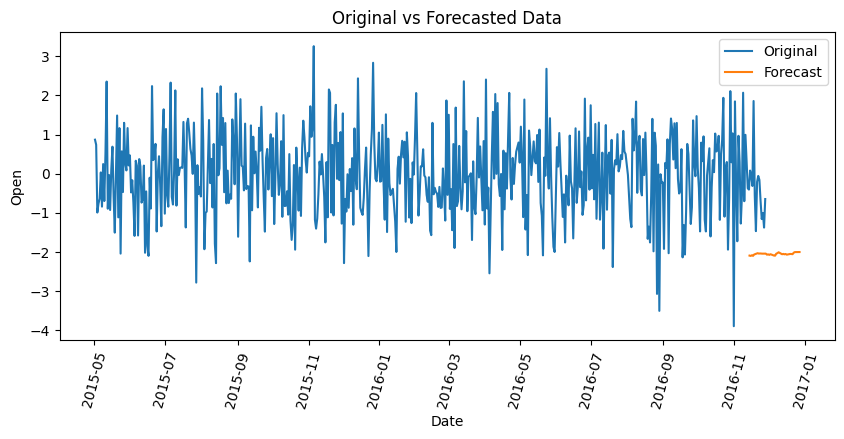

In [72]:
# Plot the results
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Open', data=original, label='Original')
sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast')
plt.xticks(rotation=75)  # Rotate x-axis labels to vertical
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Original vs Forecasted Data')
plt.legend()
plt.show()